In [1]:
import pandas as pd
from bench_data_import import import_data
from top50 import top50
import matplotlib.pyplot as plt

# Import the top 50 Raw lifters of all time by weight class and sex
df = top50()

# Create chart of average bodyweight, average bench and heaviest bench by weight class and sex
# Then calculate the relative strength and absolute & relative strength percent growth figures
sex_age_comparisons = (
    df.groupby(["weightclass_lbs", "sex"])
        .agg(
            avg_bodyweight_lbs=("bodyweight_lbs", "mean"), 
            avg_bench_lbs=("bench_lbs", "mean"), 
            heaviest_bench=("bench_lbs", "max"), 
            average_age=("age", "mean"), 
            oldest=("age", "max"), 
            youngest=("age", "min")
        )
        .round(2)
)

sex_age_comparisons

avg_bodyweight_lbs  avg_bench_lbs  heaviest_bench  \
weightclass_lbs    sex                                                      
148                F                145.80         302.17          341.72   
                   M                145.98         437.81          502.65   
165                F                161.89         310.94          363.76   
                   M                161.94         477.04          540.13   
181                F                188.36         325.45          380.30   
                   M                179.66         506.57          545.64   
198                F                193.33         320.33          402.34   
                   M                200.33         539.77          617.29   
220                F                211.96         285.94          369.27   
                   M                218.11         562.82          633.83   
242                M                237.75         589.32          672.41   
275                M                268.49         617.51          669.10   
308                M                297.03         634.89          705.48   
Super Heavy Weight F                273.69         345.12          457.46   
                   M                359.93         639.99          782.64   

                        average_age  oldest  youngest  
weightclass_lbs    sex                                 
148                F          32.37    50.0      19.5  
                   M          30.21    41.0      20.0  
165                F          36.26    53.0      22.0  
                   M          29.70    47.0      16.0  
181                F          34.34    52.0      21.0  
                   M          33.44    47.0      21.0  
198                F          35.88    56.0      22.0  
                   M          32.23    49.0      22.0  
220                F          34.61    55.0      18.5  
                   M          31.62    45.0      18.5  
242                M          32.44    46.0      21.0  
275                M          33.27    50.5      22.0  
308                M          33.84    48.0      22.0  
Super Heavy Weight F          32.77    53.0      15.0  
                   M          33.17    49.0      24.0

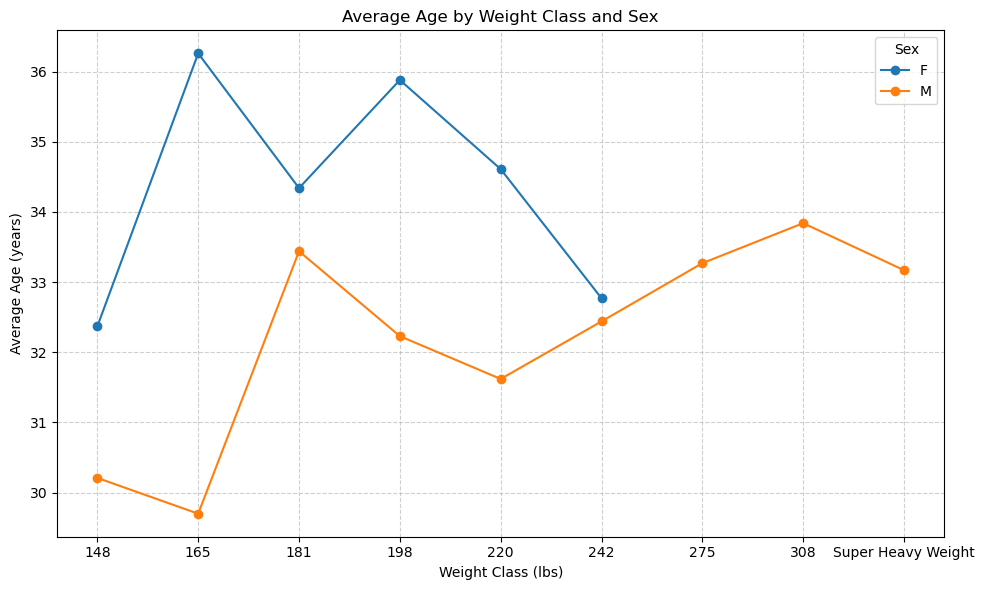

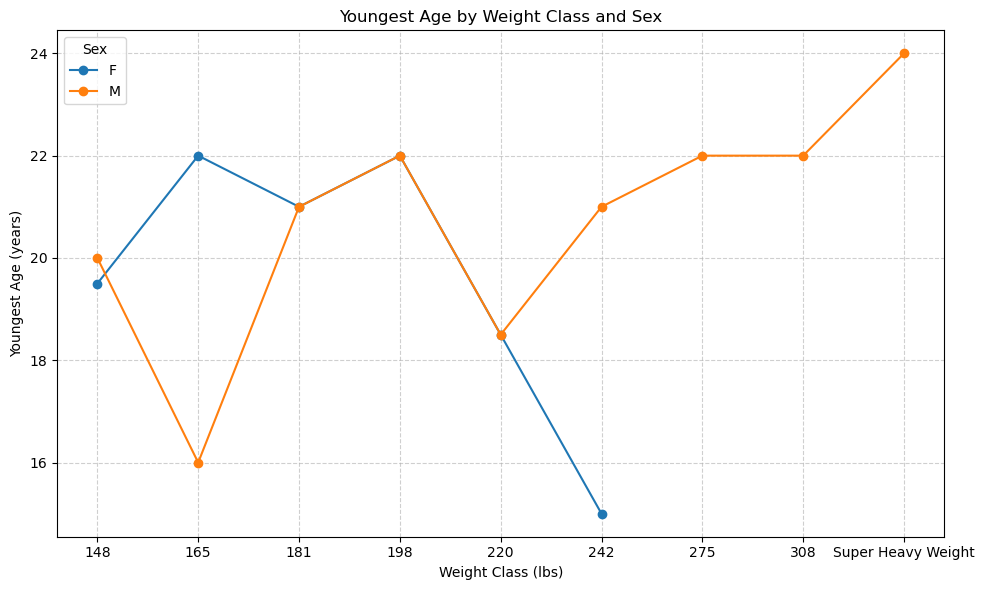

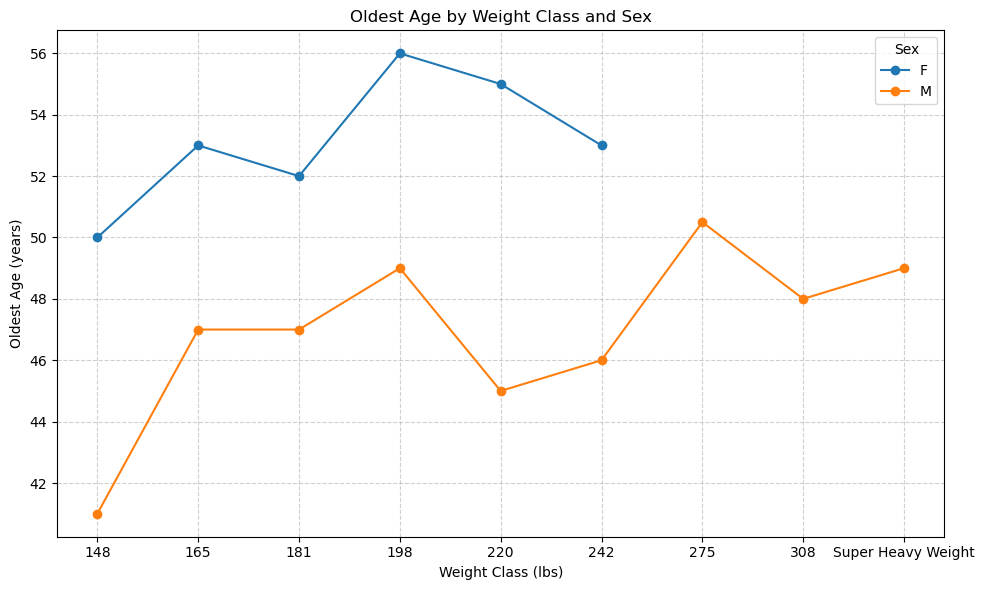

In [2]:
import matplotlib.pyplot as plt

# Reset index for plotting
plot_df = sex_age_comparisons.reset_index()

# Helper: sort weight classes numerically with "Super Heavy Weight" last 
def weightclass_sort_key(wc: str):
    wc = str(wc).strip()
    if wc.lower().startswith("super"):
        return 9999
    try:
        return float(wc.replace("+", "").split()[0])
    except ValueError:
        return 9999

# Sort dataframe by weight class numeric order
plot_df = plot_df.sort_values("weightclass_lbs", key=lambda x: x.map(weightclass_sort_key))

# Build ordered x-axis labels
ordered_labels = sorted(plot_df["weightclass_lbs"].unique(), key=weightclass_sort_key)

# Common plotting style
def plot_age_metric(y_col, title, ylabel):
    plt.figure(figsize=(10,6))
    for sex, data in plot_df.groupby("sex"):
        plt.plot(range(len(data)), data[y_col], marker='o', label=sex)
    plt.xticks(ticks=range(len(ordered_labels)), labels=ordered_labels)
    plt.title(title)
    plt.xlabel("Weight Class (lbs)")
    plt.ylabel(ylabel)
    plt.legend(title="Sex")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Average Age
plot_age_metric(
    y_col="average_age",
    title="Average Age by Weight Class and Sex",
    ylabel="Average Age (years)"
)

# Youngest Age
plot_age_metric(
    y_col="youngest",
    title="Youngest Age by Weight Class and Sex",
    ylabel="Youngest Age (years)"
)

# Oldest Age
plot_age_metric(
    y_col="oldest",
    title="Oldest Age by Weight Class and Sex",
    ylabel="Oldest Age (years)"
)
